In [40]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy
nlp = spacy.load("en_core_web_sm")
# print(os.listdir("./input"))
print(os.listdir("./multinli_1.0"))

['multinli_1.0_dev_mismatched.jsonl', 'paper.pdf', '.DS_Store', 'multinli_1.0_train.jsonl', 'multinli_1.0_dev_mismatched.txt', 'Icon\r', 'multinli_1.0_dev_matched.txt', 'multinli_1.0_dev_matched.jsonl', 'multinli_1.0_train.txt', 'README.txt']


In [39]:
# df = pd.read_json("./input/multinli_0.9_test_matched_unlabeled.jsonl", lines=True)
df = pd.read_json("./multinli_1.0/multinli_1.0_dev_matched.jsonl", lines=True)
df.head(5)

,annotator_labels,genre,gold_label,pairID,promptID,sentence1,sentence1_binary_parse,sentence1_parse,sentence2,sentence2_binary_parse,sentence2_parse
0,"[neutral, entailment, neutral, neutral, neutral]",slate,neutral,63735n,63735,The new rights are nice enough,( ( The ( new rights ) ) ( are ( nice enough )...,(ROOT (S (NP (DT The) (JJ new) (NNS rights)) (...,Everyone really likes the newest benefits,( Everyone ( really ( likes ( the ( newest ben...,(ROOT (S (NP (NN Everyone)) (VP (ADVP (RB real...
1,"[contradiction, contradiction, contradiction, ...",government,contradiction,91383c,91383,This site includes a list of all award winners...,( ( This site ) ( ( includes ( ( ( ( a list ) ...,(ROOT (S (NP (DT This) (NN site)) (VP (VBZ inc...,The Government Executive articles housed on th...,( ( ( The ( Government ( Executive articles ) ...,(ROOT (S (NP (NP (DT The) (NNP Government) (NN...
2,"[entailment, entailment, entailment, entailmen...",telephone,entailment,755e,755,uh i don't know i i have mixed emotions about ...,( ( ( ( uh ( i ( ( do n't ) ( know ( ( i i ) (...,(ROOT (SINV (S (S (INTJ (UH uh)) (NP (FW i)) (...,"I like him for the most part, but would still ...",( I ( ( ( ( ( ( like him ) ( for ( the ( most ...,(ROOT (S (NP (PRP I)) (VP (VP (VBP like) (NP (...
3,"[contradiction, contradiction, contradiction, ...",telephone,contradiction,78013c,78013,yeah i i think my favorite restaurant is alway...,( yeah ( ( i i ) ( think ( ( my ( favorite res...,(ROOT (S (VP (VB yeah) (NP (NP (FW i) (FW i)) ...,My favorite restaurants are always at least a ...,( ( My ( favorite restaurants ) ) ( ( ( ( are ...,(ROOT (S (NP (PRP$ My) (JJ favorite) (NNS rest...
4,"[contradiction, contradiction, contradiction, ...",telephone,contradiction,96377c,96377,i don't know um do you do a lot of camping,( i ( ( do n't ) ( know ( um ( do ( you ( do (...,(ROOT (S (NP (FW i)) (VP (VBP do) (RB n't) (VP...,I know exactly.,( I ( ( know exactly ) . ) ),(ROOT (S (NP (PRP I)) (VP (VBP know) (ADVP (RB...


In [14]:
data = pd.concat([df[c] for c in ["genre", "sentence1"]], axis=1).reset_index()
data.head(5)

,index,genre,sentence1
0,0,slate,That which binds together Chinese.
1,1,government,The actual length of an individual worker's H-...
2,2,fiction,Every man I put down left me empty.
3,3,telephone,and uh i really think that if uh like after se...
4,4,telephone,yep yeah yeah it was i ended up going into ban...


<AxesSubplot:>

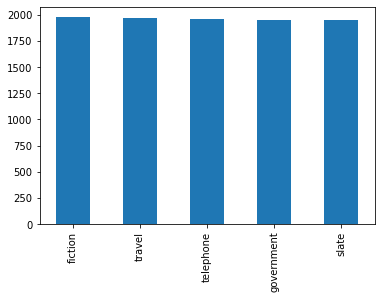

In [15]:
data["genre"].value_counts().plot(kind="bar")

In [38]:
print(data["genre"].value_counts())

fiction       1978
travel        1964
telephone     1955
government    1953
slate         1946
Name: genre, dtype: int64


<AxesSubplot:ylabel='Frequency'>

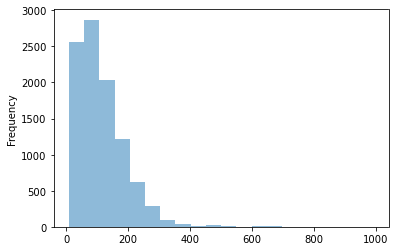

In [16]:
data["length"] = data["sentence1"].apply(len)
data["length"].plot.hist(alpha=0.5, bins=20)

<AxesSubplot:ylabel='Frequency'>

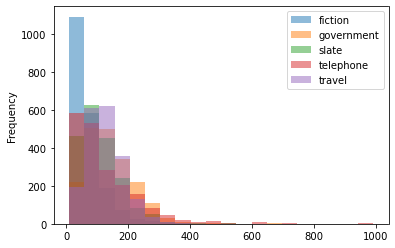

In [17]:
columns = data.groupby("genre").groups.keys()
def filter_and_measure_length(d, c):
    lengths = d[d["genre"] == c]["length"]
    lengths = lengths.rename(c).reset_index(drop=True)
    return lengths

pd.concat([filter_and_measure_length(data, c) for c in columns], axis=1).plot.hist(alpha=0.5, bins=20)

In [18]:
data.sort_values("length")["sentence1"].tail(3).values

array(["um you know i'm not sure i'm not positive i didn't i didn't really think about that i just remember trying to figure out where you could get that was real close to the good section but in the little bit cheaper but not that i'll ever go i hadn't been to a Cowboys game last time last time i went to the Cowboys game was during that um NFL strike or the when they had the scab team teams in there and it was the uh Dallas and Washington Redskins game and i went because my dad can usually get a hold of some free tickets because a lot of those doctors have season tickets and they um if they're not going to use them they'll give them to somebody else so my dad i went with my dad to a game that one time but that wasn't a real you know it was it was the scab teams it was kind of you know it was kind of different i guess and before that it's been quite a few years i've been wanting to go to a game i just never never have gotten around to it so maybe this year Texans  cheap cheaper i guess

In [19]:
data.sort_values("length")["sentence1"].head(3).values

array(['Sort of.', 'Besancon', 'Sort of.'], dtype=object)

In [20]:
duplicates = data[data.duplicated(["sentence1"], keep=False)].groupby("sentence1").groups.keys()
print(len(duplicates))

3332


In [21]:
data_except_d = data.drop_duplicates(["sentence1"])
print("Without duplicate, data size becomes {} => {}".format(len(data), len(data_except_d)))

Without duplicate, data size becomes 9796 => 3335


<AxesSubplot:>

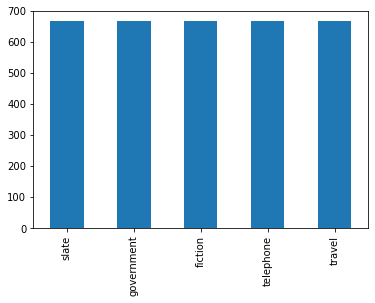

In [22]:
data_except_d["genre"].value_counts().plot(kind="bar")

In [23]:
data_except_d.sort_values("length")["sentence1"].tail(3).values

array(["Legal Services programs may record and report the provision of legal assistance as a case only  (a) the client is financially and otherwise eligible to receive assistance under the LSC Act, regulations, and other applicable law; the client's case is within program priorities (or is an emergency case accepted under the program's emergency case acceptance procedures); the legal services program has actually accepted the client for service through its intake system or another established procedure for ensuring client eligibility; (b) the type of legal assistance provided to the client is not prohibited by the LSC Act, regulations, or other applicable law (e.g.",
       "um i  am quite positive on the things that i have seen happen recently relative to women in both in society and in the work place uh there's no doubt about the fact that when i first was first graduated from college the impression was that a woman's career would consist of a childbearing years and perhaps a return 

In [24]:
data_except_d.sort_values("length")["sentence1"].head(3).values

array(['Sort of.', 'Besancon', "we'll see"], dtype=object)

In [25]:
def get_middle(df, window=3):
    center = int(len(df) / 2)
    middle = df.iloc[center-window:center+window]
    return middle.head(window * 2)
get_middle(data_except_d)["sentence1"].values

array(["They're just not permitted to express this belief.)",
       'There are fewer boats now than in the past; many boat people, especially the younger generation, have moved to housing projects.',
       'But you know what, this is nothing.', "no isn't that surprising",
       'The first time was in Italy.', 'There was silence. '],
      dtype=object)

In [26]:
# Basic spaCy 
print([t.text for t in nlp("we'll see")])

['we', "'ll", 'see']


In [27]:
data_except_d["word_count"] = data_except_d["sentence1"].apply(lambda x: len(nlp(x)))

/var/folders/wc/d4s68fh54f7b70phx0bl9l7r0000gn/T/ipykernel_24831/501062581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_except_d["word_count"] = data_except_d["sentence1"].apply(lambda x: len(nlp(x)))


<AxesSubplot:ylabel='Frequency'>

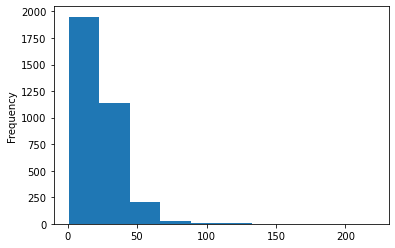

In [28]:
data_except_d["word_count"].plot.hist(bins=10)

In [29]:
data_filtered = data_except_d[(3 <= data_except_d["word_count"]) & (data_except_d["word_count"] <= 25)]
print("Extract appropriate length sentences, data size becomes {} => {}".format(len(data_except_d), len(data_filtered)))

Extract appropriate length sentences, data size becomes 3335 => 2211


<AxesSubplot:>

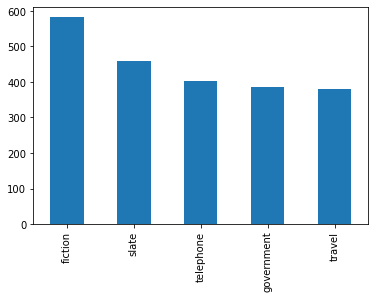

In [30]:
data_filtered["genre"].value_counts().plot(kind="bar")

In [31]:
data_filtered.sort_values("length")["sentence1"].tail(3).values

array(['First, since evaluators often needed simultaneous study at several sites, they needed several observers, which created issues of coordination and interpretation.',
       'Participants shared experiences about these transformations and acknowledged the benefits of reconfiguration, as programs complete the critical work of reorganization.',
       'The state has also recently adopted statewide priorities for connectivity and communication, developed minimum technology standards and created mechanisms to share best practices.'],
      dtype=object)

In [32]:
data_filtered.sort_values("length")["sentence1"].head(5).values

array(['Sort of.', 'I sighed.', 'Fix this.', 'i mean it', "we'll see"],
      dtype=object)

In [33]:
data_filtered["genre"].value_counts()

fiction       583
slate         460
telephone     402
government    387
travel        379
Name: genre, dtype: int64

In [34]:
data_selected = data_filtered.groupby("genre").apply(lambda x: x.sample(n=379)).drop(columns=["genre", "index"]).reset_index()
data_selected.head(5)

,genre,level_1,sentence1,length,word_count
0,fiction,2976,All right. I was moving off towards the house ...,85,18
1,fiction,1420,What? John and the lawyer looked at him startl...,50,11
2,fiction,316,"He opened his mouth, and his laughter was a mo...",82,18
3,fiction,2121,That tended to be a strategy for us in the old...,52,13
4,fiction,2753,"With that, White was into the fray- in one han...",88,20


<AxesSubplot:>

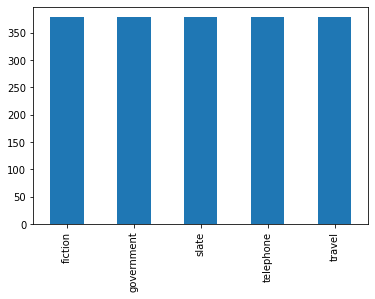

In [35]:
data_selected["genre"].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='Frequency'>

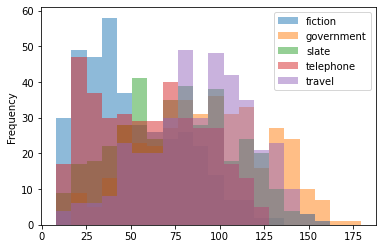

In [37]:
pd.concat([filter_and_measure_length(data_selected, c) for c in columns], axis=1).plot.hist(alpha=0.5, bins=20)